# Basic Mathmatics by Python 8-9
KGSOC「数理・データサイエンスのための基礎数学」参考資料

石田　淳 (aishida@kwansei.ac.jp)

## 8章　総和

In [1]:
import statistics as st
import math
import numpy as np

In [2]:
ex = [i for i in range(1,11)]
ex

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

listの総和は`sum`関数で得られる．

In [3]:
sum(ex)

55

自前のsum関数を`for`文を使って定義する．

In [4]:
def my_sum(vec):
    outcome = 0
    for a in vec:
        outcome += a
    return outcome

my_sum(ex)

55

平均，組み込み関数だけで計算する場合と，`statistics`パッケージの関数を使う場合を示す．

In [5]:
m = sum(ex)/len(ex)
m, st.mean(ex)

(5.5, 5.5)

分散，ただし，`st.variance`はn-1で割る不偏標本分散．`st.pvariance`はnで割る定義

In [6]:
sum_sq = sum([(x - m) ** 2 for x in ex])
# sum_sq = sum(list(map(lambda x: (x - m) ** 2, ex)))
s2 = sum_sq/(len(ex)-1)
s2, st.variance(ex)

(9.166666666666666, 9.166666666666666)

なお，listを`numpy`パッケージのndarray形式に変換するとRのベクトルのようにarrayの各要素とスカラーの演算が簡単にできる（ユニバーサル関数）．

In [7]:
import numpy as np
ex_np = np.array(ex)

((ex_np - np.mean(ex_np)) ** 2).sum()/(len(ex_np) - 1)

9.166666666666666

標準偏差，ただし，`st.stdev`はn-1で割る標本標準偏差．`st.pstdev`はnで割る定義

In [8]:
s = math.sqrt(s2)
s, st.stdev(ex)

(3.0276503540974917, 3.0276503540974917)

標準化

In [9]:
z = [(x - m)/s for x in ex]
# z = list(map(lambda x: (x - m)/s, ex))
st.mean(z), st.stdev(z)

(0.0, 1.0)

## 9章　微分

`sympy`パッケージを使えば，各種代数演算が可能になる．導関数を求めることもできる．変数は`symbols`で定義する．

In [10]:
from sympy import *
x, a = symbols('x a')

微分演算のクラスは`Derivative`．もっとも単純には`diff(func, var)`関数を用いる．

In [11]:
f = x**2 - 2*x + 4
f_dash = diff(f,x) #Derivative(f).doit()
Eq(Derivative(f),f_dash)

Eq(Derivative(x**2 - 2*x + 4, x), 2*x - 2)

もとの関数と導関数をプロット

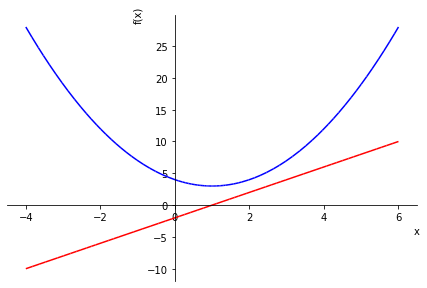

In [12]:
p = plot(f,(x,-4,6),line_color = 'b', show = False)
p.extend(plot(f_dash,(x,-4,6),line_color = 'r', show = False))
p.show()

偏差平方和を最小化する代表値として平均を導出する．

In [13]:
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x = norm.rvs(size=1000, random_state=8931)
x = np.array(x)
x = np.sort(x)
np.mean(x)

-0.03279828858699949

最小化関数を定義．

In [15]:
def f(a):
    return ((x - a) ** 2).sum()

`minimize`関数で最小化問題を解く．

In [16]:
ls = minimize(f, 0)
ls.x, ls.fun

(array([-0.03279829]), 1026.2555136271283)

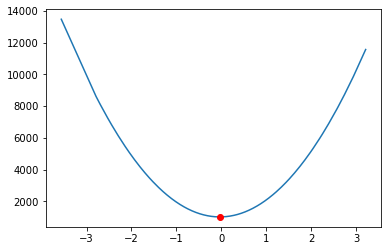

In [17]:
plt.plot(x, np.vectorize(f)(x))
plt.plot(ls.x, ls.fun, 'ro')
plt.show()